#   Constants

In [1]:
import numpy as np
import matplotlib.pyplot as plt

G = 0.01   
M = 500.0  
m = 0.1    
dt = 0.001  

T_max = 30.0 #sim time
N_steps = int(T_max / dt)
t_array = np.linspace(0, T_max, N_steps)

r0 = np.array([2.0, 0.0])  
p0 = np.array([0.0, 0.1])  
v0 = p0 / m

# Physical Functions

In [2]:
def force(r_vec): 
    r_mag = np.linalg.norm(r_vec)
    if r_mag == 0:
        return np.array([0.0, 0.0]) 
    
    r_hat = r_vec / r_mag
    F_mag = -G * M * m / (r_mag**2)
    return F_mag * r_hat

def potential_energy(r_vec):
    r_mag = np.linalg.norm(r_vec)
    if r_mag == 0:
        return 0.0
    return -G * M * m / r_mag

def kinetic_energy(v_vec):
    v_mag_sq = np.dot(v_vec, v_vec) 
    return 0.5 * m * v_mag_sq

def calculate_energies(r_hist, v_hist):
    Ep = np.array([potential_energy(r) for r in r_hist])
    Ek = np.array([kinetic_energy(v) for v in v_hist])
    Et = Ep + Ek
    return Ep, Ek, Et

# Differentiating Functions

## Euler

In [3]:
def euler(r_start, p_start, dt, n_steps):
    r_history = np.zeros((n_steps, 2))
    v_history = np.zeros((n_steps, 2))
    
    r = r_start
    p = p_start
    
    for i in range(n_steps):
        r_history[i] = r
        v = p / m
        v_history[i] = v
        F = force(r)
        
        r_next = r + v * dt + 0.5 * (F / m) * dt**2
        p_next = p + F * dt
        
        r = r_next
        p = p_next
        
    return r_history, v_history

## Verlet

In [4]:
def verlet(r_start, v_start, dt, n_steps):
    r_history = np.zeros((n_steps, 2))
    v_history = np.zeros((n_steps, 2))
    
    r_i = r_start
    
    F_0 = force(r_i)
    r_i_prev = r_i - v_start * dt + 0.5 * (F_0 / m) * dt**2 #Taylor series backward
    
    for i in range(n_steps):
        r_history[i] = r_i
        F_i = force(r_i)
        
        r_i_next = 2.0 * r_i - r_i_prev + (F_i / m) * dt**2
        
        v_i = (r_i_next - r_i_prev) / (2.0 * dt) #mean
        v_history[i] = v_i
        
        r_i_prev = r_i
        r_i = r_i_next
        
    return r_history, v_history

## Leapfrog

In [5]:
def leapfrog(r_start, v_start, dt, n_steps):

    r_history = np.zeros((n_steps, 2))
    v_history = np.zeros((n_steps, 2))
    
    r_i = r_start
    
    F_0 = force(r_i)
    v_half_prev = v_start - (F_0 / m) * (dt / 2.0) #Taylor
    
    for i in range(n_steps):
        r_history[i] = r_i
        F_i = force(r_i)
        
        v_half_next = v_half_prev + (F_i / m) * dt
        r_i_next = r_i + v_half_next * dt
        
        v_i = (v_half_prev + v_half_next) / 2.0 #mean
        v_history[i] = v_i
        
        r_i = r_i_next
        v_half_prev = v_half_next
        
    return r_history, v_history


# Simulation

## Running Sim

In [6]:
r_euler, v_euler = euler(r0, p0, dt, N_steps)
r_verlet, v_verlet = verlet(r0, v0, dt, N_steps)
r_leapfrog, v_leapfrog = leapfrog(r0, v0, dt, N_steps)

Ep_euler, Ek_euler, Et_euler = calculate_energies(r_euler, v_euler)
Ep_verlet, Ek_verlet, Et_verlet = calculate_energies(r_verlet, v_verlet)
Ep_leapfrog, Ek_leapfrog, Et_leapfrog = calculate_energies(r_leapfrog, v_leapfrog)

## Plots

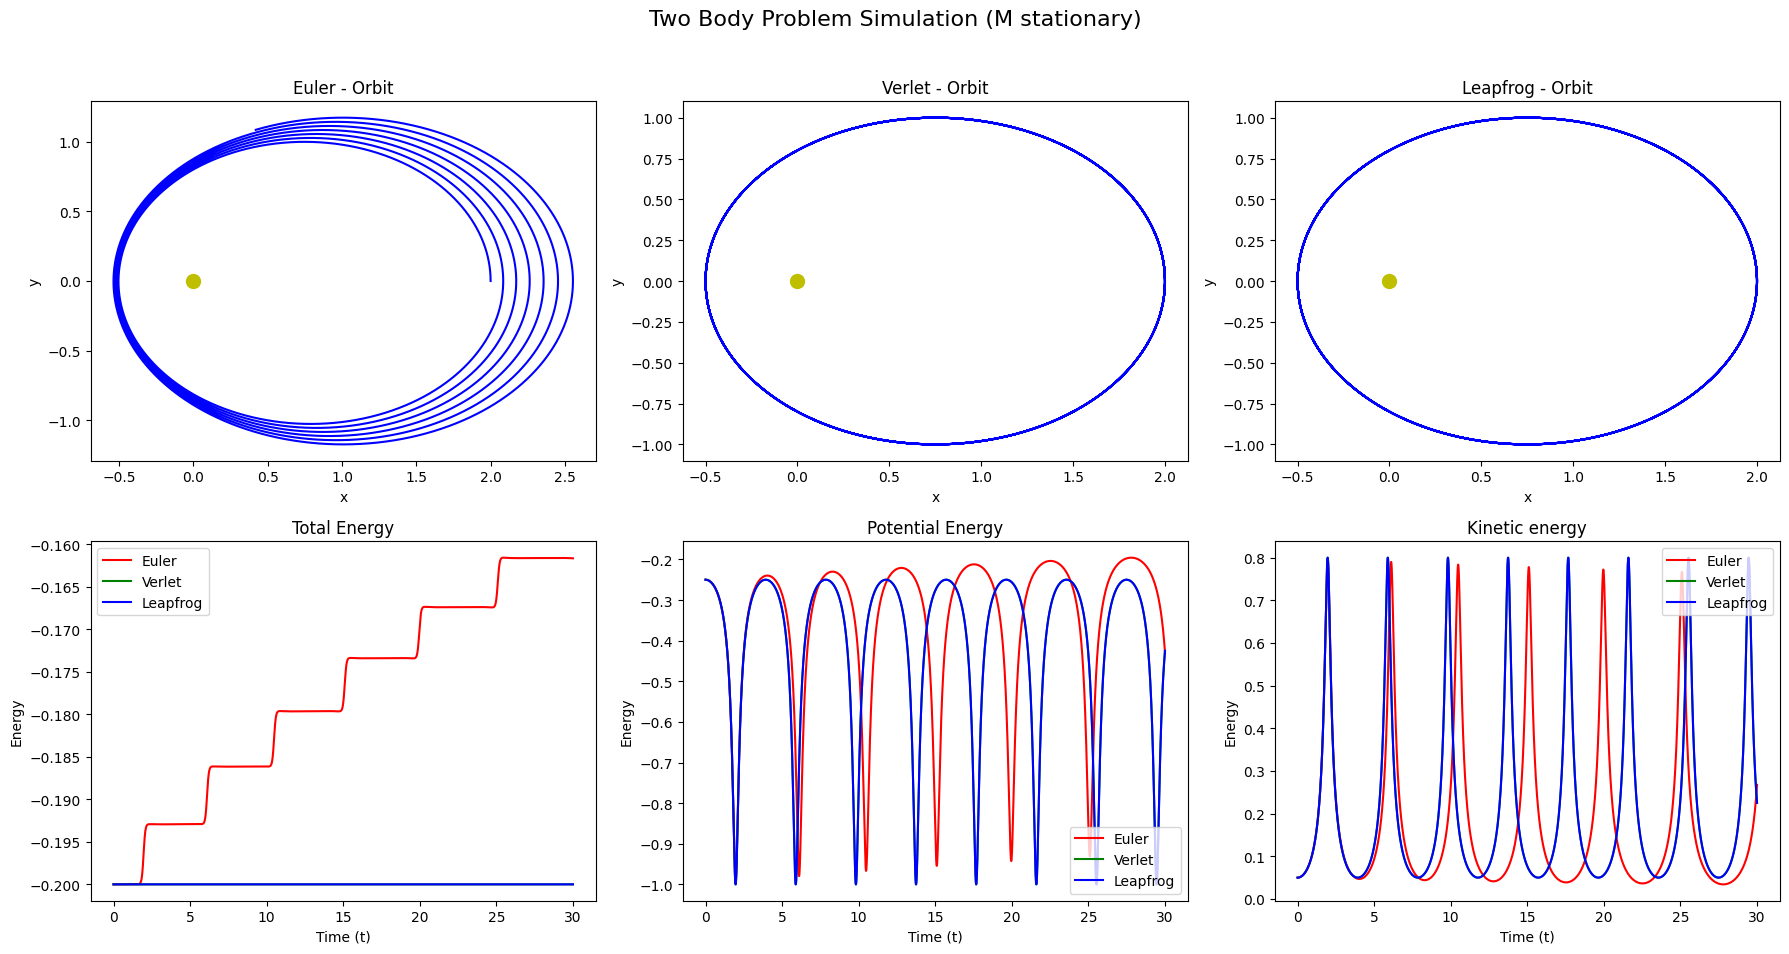

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10)) # Szerszy format
fig.suptitle('Two Body Problem Simulation (M stationary)', fontsize=16)

axs[0, 0].plot(r_euler[:, 0], r_euler[:, 1], 'b-')
axs[0, 0].plot([0], [0], 'yo', markersize=10) 
axs[0, 0].set_title('Euler - Orbit')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')

axs[0, 1].plot(r_verlet[:, 0], r_verlet[:, 1], 'b-')
axs[0, 1].plot([0], [0], 'yo', markersize=10) 
axs[0, 1].set_title('Verlet - Orbit')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')

axs[0, 2].plot(r_leapfrog[:, 0], r_leapfrog[:, 1], 'b-')
axs[0, 2].plot([0], [0], 'yo', markersize=10) 
axs[0, 2].set_title('Leapfrog - Orbit')
axs[0, 2].set_xlabel('x')
axs[0, 2].set_ylabel('y')

axs[1, 0].plot(t_array, Et_euler, 'r-', label='Euler') 
axs[1, 0].plot(t_array, Et_verlet, 'g-', label='Verlet') 
axs[1, 0].plot(t_array, Et_leapfrog, 'b-', label='Leapfrog') 
axs[1, 0].set_title('Total Energy')
axs[1, 0].set_xlabel('Time (t)')
axs[1, 0].set_ylabel('Energy')
axs[1, 0].legend()

axs[1, 1].plot(t_array, Ep_euler, 'r-', label='Euler') 
axs[1, 1].plot(t_array, Ep_verlet, 'g-', label='Verlet') 
axs[1, 1].plot(t_array, Ep_leapfrog, 'b-', label='Leapfrog') 
axs[1, 1].set_title('Potential Energy')
axs[1, 1].set_xlabel('Time (t)')
axs[1, 1].set_ylabel('Energy')
axs[1, 1].legend()

axs[1, 2].plot(t_array, Ek_euler, 'r-', label='Euler') 
axs[1, 2].plot(t_array, Ek_verlet, 'g-', label='Verlet') 
axs[1, 2].plot(t_array, Ek_leapfrog, 'b-', label='Leapfrog') 
axs[1, 2].set_title('Kinetic energy')
axs[1, 2].set_xlabel('Time (t)')
axs[1, 2].set_ylabel('Energy')
axs[1, 2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
